# Machine learning at CoDaS-HEP 2024, lesson 1 part 2

<br><br><br><br><br>

## Reminders

As a reminder, a (simple, feed-forward, 4-layer) neural network looks like this:

<img src="../img/artificial-neural-network-layers-2.svg" width="700">

<br><br><br><br><br>

Which is to say, like this:

$$
y_i =
f\left(a_{i,j}^{\mbox{\scriptsize L3--L4}} \cdot
f\left(a_{i,j}^{\mbox{\scriptsize L2--L3}} \cdot
f\left(a_{i,j}^{\mbox{\scriptsize L1--L2}} \cdot x_j + b_i^{\mbox{\scriptsize L1--L2}}\right)
+ b_i^{\mbox{\scriptsize L2--L3}}\right)
+ b_i^{\mbox{\scriptsize L3--L4}}\right)
$$

<br><br><br><br><br>

In code, that means:

In [1]:
import numpy as np

In [2]:
# take 8-dimensional input layer 1 to 7-dimensional hidden layer 2
a_L1_L2 = np.random.normal(0, 1, (7, 8))
b_L1_L2 = np.random.normal(0, 1, (7,))

# take 7-dimensional hidden layer 2 to 9-dimensional hidden layer 3
a_L2_L3 = np.random.normal(0, 1, (9, 7))
b_L2_L3 = np.random.normal(0, 1, (9,))

# take 9-dimensional hidden layer 3 to 6-dimensional output layer 4
a_L3_L4 = np.random.normal(0, 1, (6, 9))
b_L3_L4 = np.random.normal(0, 1, (6,))

def relu(x):
    return np.maximum(0, x)

def model(x):
    layer1 = x
    layer2 = relu(a_L1_L2 @ layer1 + b_L1_L2)
    layer3 = relu(a_L2_L3 @ layer2 + b_L2_L3)
    layer4 = relu(a_L3_L4 @ layer3 + b_L3_L4)
    y = layer4
    return y

Here's the model's output for a sample input:

In [3]:
x = np.random.normal(0, 1, (8,))

model(x)

array([1.71979129, 0.57298311, 0.        , 0.49597505, 1.64738228,
       0.41089435])

<br><br><br><br><br>

Given a large dataset of `x` vectors, an equally large set of expected `y` vectors, and a minimizer, we could train the model by optimizing these parameters:

In [4]:
a_L1_L2

array([[-1.23192932, -0.64113051,  1.11522683,  1.41865799,  0.30858186,
         0.76379441,  0.53379535, -0.54453359],
       [ 0.0103671 , -0.24643208, -1.64532578,  0.59425957,  0.20943685,
         1.06471571, -0.14549212, -1.76811249],
       [-1.90406389,  0.45227002, -0.87023317, -0.10534914,  0.56801827,
        -0.39426655, -0.74640007,  0.17750819],
       [-1.76716284, -0.88709423, -0.3420168 ,  0.41792301,  1.51307334,
        -0.11635326, -0.3994522 ,  0.64546247],
       [ 0.16686639,  0.59970564, -0.21972464, -0.35566829,  1.82015145,
        -0.41863148,  0.23186748,  1.13188158],
       [-0.18771708, -1.71009927,  0.77017863,  0.77589493, -0.12097548,
         1.24719539, -1.00871773,  0.03257008],
       [-2.73568432, -0.70220164,  0.7116408 ,  0.20983439, -0.67043816,
        -0.84962902, -0.49058575,  2.54115441]])

In [5]:
b_L1_L2

array([-0.23811548, -0.30485549, -0.84437334, -0.30278117,  0.07313547,
       -0.28557822, -0.69952344])

In [6]:
a_L2_L3

array([[ 1.34152173, -0.8688263 ,  0.12174589, -0.90351955, -0.56600362,
        -0.07908737,  0.91910644],
       [-1.91532434,  0.3686158 , -0.4115736 , -1.66062374,  1.7144848 ,
         0.56163477, -1.19263351],
       [-0.27843674,  0.38159891, -1.19918546, -0.30813451, -1.52375149,
         1.42203008, -0.00371092],
       [ 0.49080085, -0.15732464,  0.73433552,  0.88924736,  1.16924867,
        -1.84081811,  0.83142447],
       [-0.57742742,  0.52199091, -0.01632793,  2.68323098, -0.31694183,
         0.61065041,  1.23246797],
       [-1.63160805, -0.37042617, -0.289798  ,  1.72602282,  0.90359798,
        -0.30508221, -1.08271576],
       [ 0.66349889, -1.48210291,  0.45139286, -0.89748348, -2.47908296,
         0.55593133,  1.12633955],
       [ 0.27910619, -0.77512532,  1.4956282 ,  1.32798279, -0.92150082,
         1.97153667,  0.29041091],
       [ 1.51482665, -1.9945391 , -1.12641829,  0.7090924 ,  0.23428658,
         0.94385647, -0.88625486]])

In [7]:
b_L2_L3

array([ 1.26382299,  0.47531196,  0.07405909, -0.08576521,  0.02966903,
        1.6840952 ,  0.5987658 , -1.17767538, -0.45778203])

In [8]:
a_L3_L4

array([[ 0.07388794, -1.97529393,  1.11427759,  0.70463867, -0.05518402,
        -2.06253053, -0.89782866, -1.77818276, -0.65368353],
       [-0.72714158, -2.22325707, -0.60633628,  0.69109026,  1.66221032,
        -1.16789673, -0.94984877, -0.85842504, -0.62682674],
       [-0.70193558,  0.02378946,  0.74770469, -1.33588141, -1.01809515,
         0.35868739, -0.107352  ,  1.02538805, -0.50771206],
       [ 0.0144468 , -1.44274062,  1.49777183, -1.27609704,  0.50305988,
        -0.32183279, -0.47011106, -1.55857842, -0.27364445],
       [ 0.94995461,  0.8069397 , -0.68812039,  1.29671115, -0.25391037,
        -0.55213729,  1.0033758 , -0.21240207,  0.24249752],
       [-0.10861222, -2.09748783, -0.84613885,  1.66417104, -0.13305444,
        -0.09841672,  0.77712323,  1.61491003, -0.51567063]])

In [9]:
b_L3_L4

array([ 1.11933157,  1.98768708, -2.69056852,  0.56639018, -0.59605121,
        0.28225036])

such that `model(x)` comes as close as possible to `y`.

Then we could use `model(x_new)` to predict new $y$ values for `x_new`, and the predictions would have (roughly) the same correlations as the training dataset.

<br><br><br><br><br>

HEP has a favorite minimizer: MINUIT.

Introduced in 1972 by Fred James, MINUIT computes numerical second derivatives of the function, attempts to jump to the minimum, and then recomputes.

<img src="../img/minuit-1975.png" width="1000">

<br><br><br><br><br>

It doesn't scale well with a large number of parameters to optimize, and we would have

In [10]:
a_L1_L2.size + b_L1_L2.size + a_L2_L3.size + b_L2_L3.size + a_L3_L4.size + b_L3_L4.size

195

parameters to optimize in this simple example.

Nevertheless, we'll use MINUIT in some early examples, through the excellent iminuit package.

<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width="300">

In [11]:
import iminuit

<br><br><br><br><br>

As another simplification, note that we don't have to maintain the distinction between matrices of parameters $a_{i,j}$ and vectors of parameters $b_i$:

$$
\left(\begin{array}{c c c c}
a_{1,1} & a_{1,2} & \ldots & a_{1,10} \\
a_{2,1} & a_{2,2} & \ldots & a_{2,10} \\
a_{3,1} & a_{3,2} & \ldots & a_{3,10} \\
a_{4,1} & a_{4,2} & \ldots & a_{4,10} \\
a_{5,1} & a_{5,2} & \ldots & a_{5,10} \\
\end{array}\right) \cdot \left(\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_{10} \\
\end{array}\right) + \left(\begin{array}{c}
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5 \\
\end{array}\right)
$$

is the same as

$$
\left(\begin{array}{c c c c c}
a_{1,1} & a_{1,2} & \ldots & a_{1,10} & b_1 \\
a_{2,1} & a_{2,2} & \ldots & a_{2,10} & b_2 \\
a_{3,1} & a_{3,2} & \ldots & a_{3,10} & b_3 \\
a_{4,1} & a_{4,2} & \ldots & a_{4,10} & b_4 \\
a_{5,1} & a_{5,2} & \ldots & a_{5,10} & b_5 \\
\end{array}\right) \cdot \left(\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_{10} \\
1 \\
\end{array}\right)
$$

We can absorb our $b_i$ vectors into a bigger matrix $A_{i,j}$ with the understanding that we concatenate a $1$ at the end of the $x_j$ vector.

<br><br><br><br><br>

## What's so special about this linear-nonlinear sandwich?

The goal of curve-fitting is to _approximate a function_ from noisy samples.

Neural networks are special because they are exceptionally good at approximating functions, a fact that is formally expressed as the [universal approximation theorem(s)](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

<br><br><br><br><br>

As a physicist, I've approximated a few functions in my time. What's "exceptionally good" about this method?

<br><br><br><br><br>

### Demonstrate with a sample problem

Suppose $x$ and $y$ are related as

$$ y = \left\{\begin{array}{l l}
\sin(22 x) & \mbox{if } |x - 0.43| < 0.15 \\
-1 + 3.5 x - 2 x^2 & \mbox{otherwise} \\
\end{array}\right. $$

with small errors.

In [12]:
def truth(x):
    return np.where(abs(x - 0.43) < 0.15, np.sin(22*x), -1 + 3.5*x - 2*x**2)

x = np.random.uniform(0, 1, 1000)
y = truth(x) + np.random.normal(0, 0.03, 1000)

<br><br>

In [13]:
import matplotlib.pyplot as plt

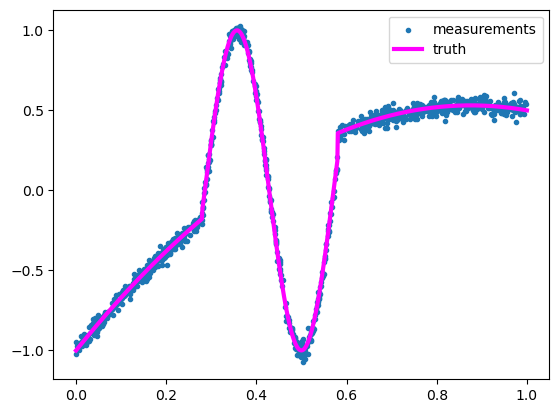

In [14]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)

ax.legend(["measurements", "truth"])

None

<br><br><br><br><br>

### Attempt 1: a linear fit

A linear fit is terrible because the curve isn't close to being linear.

In [29]:
# a linear fit can be computed analytically, which is nice
sum1 = len(x)
sumx = np.sum(x)
sumy = np.sum(y)
sumxx = np.sum(x**2)
sumxy = np.sum(x * y)
delta = (sum1 * sumxx) - (sumx * sumx)

slope = ((sum1 * sumxy) - (sumx * sumy)) / delta
intercept = ((sumxx * sumy) - (sumx * sumxy)) / delta

model_x = np.linspace(0, 1, 1000)
model_y = slope * model_x + intercept

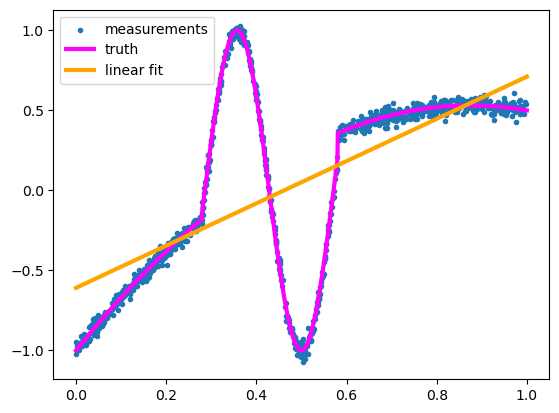

In [30]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", "linear fit"])

None

<br><br><br><br><br>

### Attempt 2: a theory-driven ansatz

A physicist's usual strategy is to find the underlying theory, even if some parameters are unknown (an "ansatz").

Suppose we _just know_ that the functional form is

$$ y = \left\{\begin{array}{l l}
\sin(C x) & \mbox{if } |x - A| < B \\
D + E x + F x^2 & \mbox{otherwise} \\
\end{array}\right. $$

for some $A$, $B$, $C$, $D$, $E$, $F$.

In [17]:
def ansatz(x, A, B, C, D, E, F):
    return np.where(abs(x - A) < B, np.sin(C*x), D + E*x + F*x**2)

In [18]:
from iminuit.cost import LeastSquares

In [31]:
# define an ordinary least-squares cost function that is minimized when the parameterized ansatz is equal to the true function
least_squares = LeastSquares(x, y, 0.005, ansatz)

# set initial parameter values
minimizer = iminuit.Minuit(least_squares, A=0.43, B=0.15, C=22, D=-1, E=3.5, F=-2)
minimizer.migrad()

model_x = np.linspace(0, 1, 1000)
model_y = ansatz(model_x, **{p.name: p.value for p in minimizer.params})

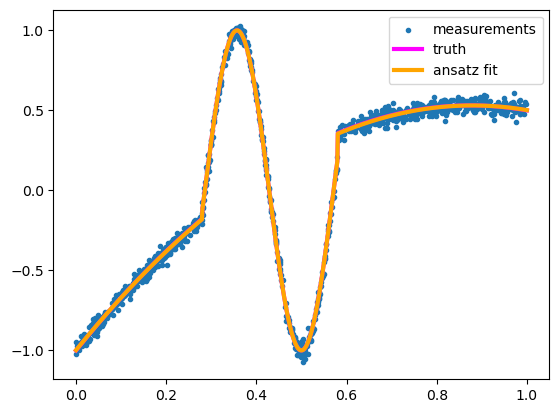

In [32]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", "ansatz fit"])

None

<br><br>

It's a great fit, but

* we don't always know the functional form: what if it's a dataset of human behaviors?
* it depends sensitively on the initial parameters and step size (try starting any of the parameters at the wrong value).

<br><br><br><br><br>

### Attempt 3: orthonormal basis functions

As physicists, we would approach a _generic_ unknown function with a [Taylor series](https://en.wikipedia.org/wiki/Taylor_series), a [Fourier series](https://en.wikipedia.org/wiki/Fourier_series), or other sum of orthonormal basis functions ([Jacobi](https://en.wikipedia.org/wiki/Jacobi_polynomials), [Laguerre](https://en.wikipedia.org/wiki/Laguerre_polynomials), [Hermite](https://en.wikipedia.org/wiki/Hermite_polynomials), [Chebyshev](https://en.wikipedia.org/wiki/Chebyshev_polynomials), ...).

In [33]:
# NumPy has a function for polynomial fits (which is analytic because it can be transformed into a linear fit)
coefficients = np.polyfit(x, y, 15 - 1)[::-1]

model_x = np.linspace(0, 1, 1000)
model_y = sum(c * model_x**i for i, c in enumerate(coefficients))

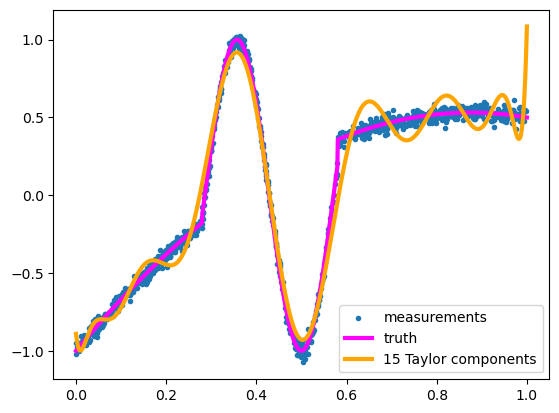

In [34]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{len(coefficients)} Taylor components"])

None

<br><br><br><br><br>

In [35]:
# NumPy's FFT doesn't apply because the data aren't uniformly spaced, but we can compute a Fourier series with integrals
sort_index = np.argsort(x)
x_sorted = x[sort_index]
y_sorted = y[sort_index]

constant_term = np.trapz(y_sorted, x_sorted)
cos_terms = [2*np.trapz(y_sorted * np.cos(2*np.pi * (i + 1) * x_sorted), x_sorted) for i in range(7)]
sin_terms = [2*np.trapz(y_sorted * np.sin(2*np.pi * (i + 1) * x_sorted), x_sorted) for i in range(7)]

model_x = np.linspace(0, 1, 1000)
model_y = (
    constant_term +
    sum(coefficient * np.cos(2*np.pi * (i + 1) * model_x) for i, coefficient in enumerate(cos_terms)) +
    sum(coefficient * np.sin(2*np.pi * (i + 1) * model_x) for i, coefficient in enumerate(sin_terms))
)

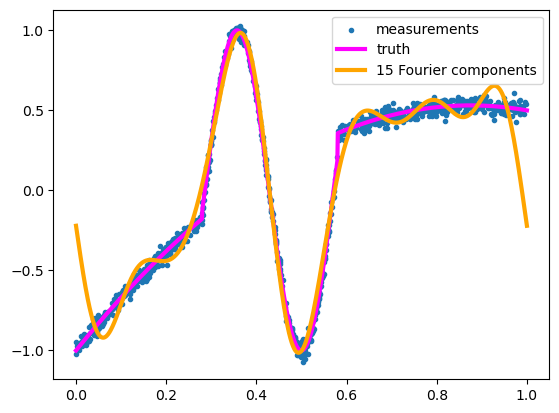

In [36]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{1 + len(cos_terms) + len(sin_terms)} Fourier components"])

None

<br><br>

The problem is that the true function is neither polynomial nor sinusoidal.

It can be fit with a large number of components, but the convergence is slow and has artifacts.

<br><br><br><br><br>

### Attempt 4: adaptive basis functions

The classical methods (Taylor, Fourier, etc.) have one thing in common: they all use a fixed set of functions $\psi_i$ for discrete $i$:

$$ f(x) = \sum_i^N c_i \psi_i(x) $$

All that can vary in the fit are the coefficients $c_i$ in front of each function.

<br><br><br><br><br>

Suppose, instead, we had a set of functions that could also _change shape_:

$$ f(x) = \sum_i^N c_i \psi(x; \alpha_i, \beta_i) $$

For instance, the functions are sigmoids whose center $\alpha$ and width $\beta$ are adjustable:

$$ \psi(x; \alpha, \beta) = \frac{1}{1 + \exp\big((x - \alpha)/\beta\big)} $$

In [25]:
def sigmoid_component(x, center, width):
    with np.errstate(over="ignore", divide="ignore"):
        return 1 / (1 + np.exp((x - center) / width))

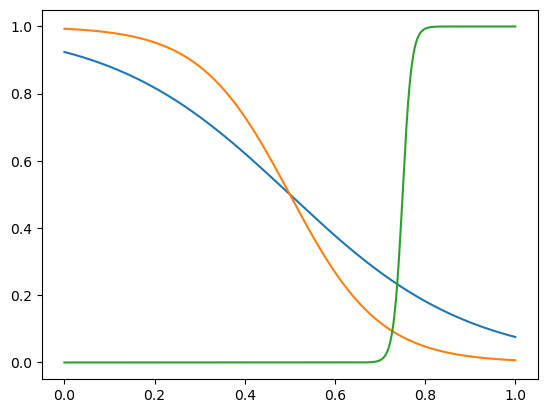

In [26]:
fig, ax = plt.subplots()

model_x = np.linspace(0, 1, 1000)

ax.plot(model_x, sigmoid_component(model_x, 0.5, 0.2))
ax.plot(model_x, sigmoid_component(model_x, 0.5, 0.1))
ax.plot(model_x, sigmoid_component(model_x, 0.75, -0.01))

None

<br><br><br><br><br>

In [49]:
def sigmoid_sum(x, parameters):
    out = np.zeros_like(x)
    for coefficient, center, width in parameters.reshape(-1, 3):
        out += coefficient * sigmoid_component(x, center, width)
    return out

least_squares = LeastSquares(x, y, 0.005, sigmoid_sum)

best_minimizer = None
for iteration in range(15):
    initial_parameters = np.zeros(5 * 3)
    initial_parameters[0::3] = np.random.normal(0, 1, 5)
    initial_parameters[1::3] = np.random.uniform(0, 1, 5)
    initial_parameters[2::3] = np.random.normal(0, 0.1, 5)

    minimizer = iminuit.Minuit(least_squares, initial_parameters)
    minimizer.migrad()

    if best_minimizer is None or minimizer.fval < best_minimizer.fval:
        best_minimizer = minimizer

model_x = np.linspace(0, 1, 1000)
model_y = sigmoid_sum(np.linspace(0, 1, 1000), np.array(best_minimizer.values))

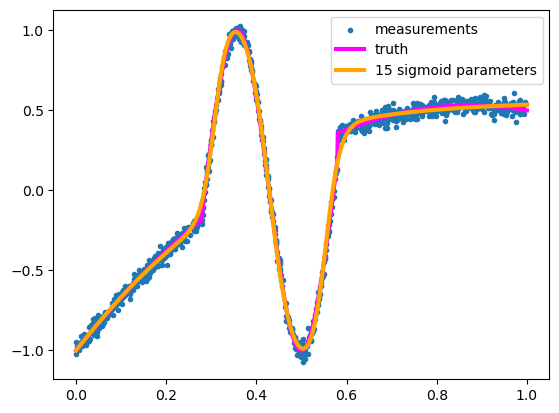

In [50]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{len(minimizer.parameters)} sigmoid parameters"])

None